In [1]:
import sys
import os.path
import pylab as plt
from zedstat import zedstat 
import pandas as pd
plt.style.use('fivethirtyeight')

In [2]:
#
# order is order of spline used for smoothing
# alpha is significance level
# prevalence is prevalence of positive class
# data='../../../data/CURVES/CANCER_UTERUS/National_ROC_CURVE_Female.csv'
#data='/home/ishanu/Dropbox/ZED/Research/CDMRPgrants/KPgrant/data/CURVES/CANCER_UTERUS/National_ROC_CURVE_Female.csv'
#zt=zedstat.processRoc(df=pd.read_csv(data),
#           order=3, 
#           total_samples=1.4*1e6,
#           positive_samples=6000,
#           alpha=0.01,
#           prevalence=.0038)
prev_vet=0.00317
prev_pub=0.00135
prev_si=0.043
data='/home/ishanu/Dropbox/ZED/Research/CDMRPgrants/TBI/data/CURVES/SISA/National_ROC_CURVE_Male.csv'
zt=zedstat.processRoc(df=pd.read_csv(data),
           order=3, 
           total_samples=5*1e6,
           positive_samples=22700,
           alpha=0.01,
           prevalence=prev_pub)

In [3]:
# compute smoothened roc and other performance measures
zt.smooth(STEP=0.001)
zt.allmeasures(interpolate=False)
zt.usample(precision=3)
zt.getBounds()

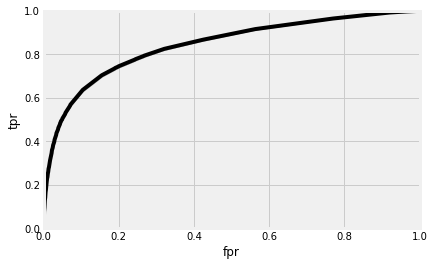

In [4]:
ax=plt.gca()
ax=zt.get().tpr.plot(ax=ax,color='k')
plt.fill_between(x=zt.get().index, y1=zt.df_lim['U'].tpr,y2=zt.df_lim['L'].tpr, color='k',alpha=.2)
ax.set_xlim(0,1)
ax.set_ylim(0,1)
ax.set_ylabel('tpr');

In [5]:
zt.auc()

(0.8432246941045607, 0.8483010724991995, 0.8381483157099218)

In [6]:
zt.get()

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.000,0.000000,NaN,0.998650,0.998650,NaN,1.000000,2.000000
0.001,0.076010,0.064846,0.997119,0.998750,51.392990,0.925479,0.037229
0.002,0.095291,0.057473,0.996496,0.998776,45.204238,0.906758,0.033441
0.003,0.127735,0.046984,0.995236,0.998818,36.485860,0.875393,0.028043
0.004,0.140897,0.043868,0.994599,0.998835,33.956234,0.862750,0.026434
...,...,...,...,...,...,...,...
0.996,0.999682,0.001355,0.005267,0.999890,1.003786,0.081026,0.003287
0.997,0.999762,0.001354,0.004287,0.999890,1.002840,0.081026,0.003287
0.998,0.999841,0.001353,0.003308,0.999890,1.001893,0.081026,0.003287


In [7]:
zt.operating_zone(LRminus=.99,LRplus=2)
display(zt._operating_zone)
F=0.21*(0.95-0.69) + 0.08*(0.95-0.17)
F=0.33*(0.95-0.17)
surv_rate=0.81
F=1
surv_rate=0.47 
rf0=zt.interpret(fpr=zt._operating_zone.fpr.values[0],number_of_positives=100,
                      five_yr_survival=surv_rate,factor=F)
rf1=zt.interpret(fpr=zt._operating_zone.fpr.values[1],number_of_positives=100,
                      five_yr_survival=surv_rate,factor=F)
print('high precision operation:\n','\n '.join(rf0[1]))
print('\n')
print('high recall operation:\n','\n '.join(rf1[0]))

,fpr,tpr,ppv,acc,npv,LR+,LR-,threshold
high precision,0.001,0.076010,0.064846,0.997119,0.998750,51.39299,0.925479,0.037229
high sensitivity,0.441,0.873407,0.002697,0.558680,0.999696,2.00076,0.225195,0.003493


high precision operation:
 For every 100 positive instances
 we raise 1779 flags,
 out of which 37 are true positives
 1743 are false alarms
 63 cases are missed
 Number needed to screen is 91.58798598304075


high recall operation:
 pos
 flags
 tp
 fp
 fn
 tn


## writing tables to latex

In [8]:
from zedstat.textable import textable
#textable(zt.get(),tabname='table.tex',FORMAT='%1.1f',TABFORMAT='L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}|L{1in}',LNTERM='\\\\\n')

In [9]:
#pd.options.display.html.use_mathjax = False
from zedstat.textable import tablewithbounds
xf=tablewithbounds(zt.get(),zt.usample(zt.df_lim['U']),zt.usample(zt.df_lim['L']))#.to_csv('table.csv')
xf.loc[zt._operating_zone.fpr.values]

,tpr,ppv,acc,npv,LR+,LR-,threshold
fpr,,,,,,,
0.001,$0.076 \pm 0.004$,$0.064 \pm 0.005$,$0.997 \pm 6.116$,$0.998 \pm 6.115$,$51.39 \pm 4.530$,$0.925 \pm 0.004$,0.037229
0.441,$0.873 \pm 0.005$,$0.002 \pm 1.733$,$0.558 \pm 7.674$,$0.999 \pm 1.373$,$2.000 \pm 0.012$,$0.225 \pm 0.010$,0.003493


In [10]:
from zedstat.textable import textable
textable(xf,tabname='tmp.tex',FORMAT='%1.3f',INDEX=True,LNTERM='\\\\\n',HEADERCOLOR='\\rowcolor{lightgray}')     

Empty DataFrame
Columns: [fpr, tpr, ppv, acc, npv, LR+, LR-, threshold]
Index: []
\rowcolor{lightgray}fpr&tpr&ppv&acc&npv&LR+&LR-&threshold\\\hline



In [11]:
! cat tmp.tex


\rowcolor{lightgray}fpr&tpr&ppv&acc&npv&LR+&LR-&threshold\\\hline
0.000& $0.0  \pm  0.0$ & $nan  \pm  0.005$ & $0.998  \pm  0.0$ & $0.998  \pm  0.0$ & $nan  \pm  5.356$ & $1.0  \pm  0.0$ &2.000\\
0.001& $0.076  \pm  0.004$ & $0.064  \pm  0.005$ & $0.997  \pm  6.116$ & $0.998  \pm  6.115$ & $51.39  \pm  4.530$ & $0.925  \pm  0.004$ &0.037\\
0.002& $0.095  \pm  0.005$ & $0.057  \pm  0.002$ & $0.996  \pm  6.776$ & $0.998  \pm  6.782$ & $45.20  \pm  2.509$ & $0.906  \pm  0.005$ &0.033\\
0.003& $0.127  \pm  0.005$ & $0.046  \pm  0.002$ & $0.995  \pm  7.704$ & $0.998  \pm  7.719$ & $36.48  \pm  1.902$ & $0.875  \pm  0.005$ &0.028\\
0.004& $0.140  \pm  0.005$ & $0.043  \pm  0.001$ & $0.994  \pm  8.029$ & $0.998  \pm  8.054$ & $33.95  \pm  1.487$ & $0.862  \pm  0.005$ &0.026\\
0.005& $0.166  \pm  0.006$ & $0.039  \pm  0.001$ & $0.993  \pm  8.593$ & $0.998  \pm  8.629$ & $30.08  \pm  1.273$ & $0.838  \pm  0.006$ &0.024\\
0.006& $0.178  \pm  0.006$ & $0.037  \pm  0.001$ & $0.992  \pm  8.838$ & $